In [ ]:
!pip install imbalanced-learn

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from keras.layers import Dense, Dropout, BatchNormalization
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential, clone_model
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv("gdrive/My Drive/stroke_cat.csv")
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df['stroke'], test_size=0.20, random_state=42)

In [ ]:
sm = SMOTE()
X, y  = sm.fit_resample(X_train, y_train)

In [ ]:
def f1_score(y_test, preds):
    cm = confusion_matrix(y_test, preds)
    return cm[0][0] / (cm[0][0] + 0.5 *(cm[0][1] + cm[1][0]))

In [ ]:
def pred_acc(y_test, preds):
    y_test = y_test.tolist()
    score = 0

    for i in range(len(preds)):
        if preds[i] == y_test[i]:
            score += 1
    
    return score / len(preds)

In [ ]:
def plot_confusion_matrix(y_test, preds):
    sb.heatmap(confusion_matrix(y_test, preds), annot = True, cmap = "viridis", fmt = "2")
    plt.show()

# **ARTIFICIAL NEURAL NETWORK**

In [ ]:
def ann_model():
    ann = Sequential()

    ann.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
    ann.add(Dropout(0.1))
    ann.add(BatchNormalization())

    ann.add(Dense(64, activation='relu'))
    ann.add(Dropout(0.1))
    ann.add(BatchNormalization())

    ann.add(Dense(32, activation='relu'))
    ann.add(Dropout(0.1))
    ann.add(BatchNormalization())

    ann.add(Dense(16, activation='relu'))
    ann.add(Dropout(0.1))

    ann.add(Dense(1, activation='sigmoid'))

    opt = Adam(learning_rate=0.000001)

    ann.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

    return ann

In [ ]:
ann_smote = ann_model()
ann_no_smote = ann_model()

Epoch 1/100
943/943 [==============================] - 12s 7ms/step - loss: 0.7620 - accuracy: 0.5110 - val_loss: 1.0261 - val_accuracy: 0.6711
Epoch 2/100
943/943 [==============================] - 6s 6ms/step - loss: 0.7559 - accuracy: 0.5122 - val_loss: 1.0174 - val_accuracy: 0.6660
Epoch 3/100
943/943 [==============================] - 4s 4ms/step - loss: 0.7485 - accuracy: 0.5292 - val_loss: 0.9980 - val_accuracy: 0.6721
Epoch 4/100
943/943 [==============================] - 3s 3ms/step - loss: 0.7390 - accuracy: 0.5305 - val_loss: 0.9601 - val_accuracy: 0.6853
Epoch 5/100
943/943 [==============================] - 3s 3ms/step - loss: 0.7357 - accuracy: 0.5382 - val_loss: 0.9388 - val_accuracy: 0.6894
Epoch 6/100
943/943 [==============================] - 3s 3ms/step - loss: 0.7261 - accuracy: 0.5467 - val_loss: 0.9729 - val_accuracy: 0.6690
Epoch 7/100
943/943 [==============================] - 3s 3ms/step - loss: 0.7265 - accuracy: 0.5506 - val_loss: 0.9674 - val_accuracy: 0.700

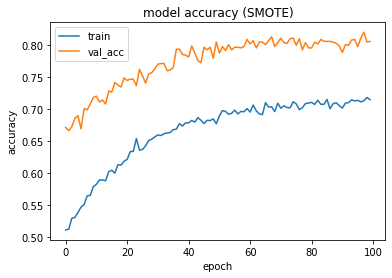

In [ ]:
history = ann_smote.fit(X, y, epochs=100, batch_size=8, validation_data=(X_test,y_test))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy (SMOTE)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val_acc'], loc='upper left')
plt.show()

Epoch 1/100
491/491 [==============================] - 3s 4ms/step - loss: 0.4030 - accuracy: 0.8737 - val_loss: 0.4557 - val_accuracy: 0.8605
Epoch 2/100
491/491 [==============================] - 2s 3ms/step - loss: 0.4098 - accuracy: 0.8739 - val_loss: 0.4551 - val_accuracy: 0.8666
Epoch 3/100
491/491 [==============================] - 2s 3ms/step - loss: 0.4057 - accuracy: 0.8739 - val_loss: 0.4496 - val_accuracy: 0.8717
Epoch 4/100
491/491 [==============================] - 2s 3ms/step - loss: 0.3972 - accuracy: 0.8857 - val_loss: 0.4422 - val_accuracy: 0.8697
Epoch 5/100
491/491 [==============================] - 2s 4ms/step - loss: 0.4018 - accuracy: 0.8831 - val_loss: 0.4403 - val_accuracy: 0.8768
Epoch 6/100
491/491 [==============================] - 2s 3ms/step - loss: 0.3988 - accuracy: 0.8829 - val_loss: 0.4317 - val_accuracy: 0.8870
Epoch 7/100
491/491 [==============================] - 2s 3ms/step - loss: 0.3946 - accuracy: 0.8887 - val_loss: 0.4417 - val_accuracy: 0.8788

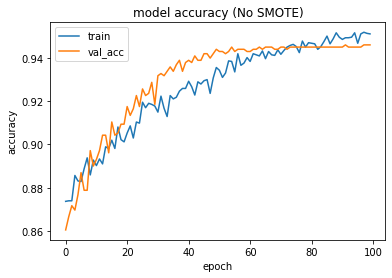

In [ ]:
history = ann_no_smote.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test,y_test))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy (No SMOTE)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val_acc'], loc='upper left')
plt.show()

# **XGBOOST**

In [ ]:
xgb_smote = XGBClassifier(learning_rate=0.1,objective='binary:logistic', eval_metric='mlogloss')
xgb_no_smote = XGBClassifier(learning_rate=0.1,objective='binary:logistic', eval_metric='mlogloss')
xgb_smote.fit(X, y)
xgb_no_smote.fit(X_train, y_train)

XGBClassifier(eval_metric='mlogloss')

# **RANDOM FOREST**

In [ ]:
rf_smote = RandomForestClassifier(max_depth=50, random_state=0)
rf_no_smote = RandomForestClassifier(max_depth=50, random_state=0)
rf_smote.fit(X, y)
rf_no_smote.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, random_state=0)

# **LOGISTIC REGRESSION**

In [ ]:
lm_smote = LogisticRegression()
lm_no_smote = LogisticRegression()
lm_smote.fit(X, y)
lm_no_smote.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

Artificial Neural Network (SMOTE)
----------------------------------------
Prediction Accuracy: 0.8054989816700611
F1 Score           : 0.8879765395894428


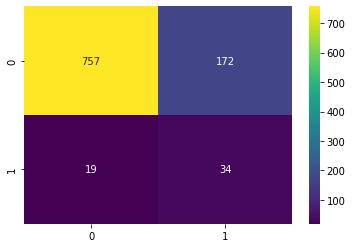


Artificial Neural Network (No SMOTE)
----------------------------------------
Prediction Accuracy: 0.9460285132382892
F1 Score           : 0.9722658294086866


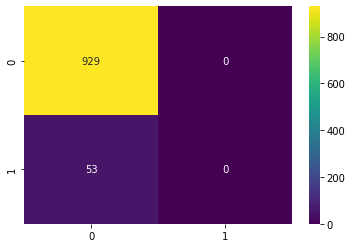


XGBoost (SMOTE)
----------------------------------------
Prediction Accuracy: 0.9307535641547862
F1 Score           : 0.9641350210970464


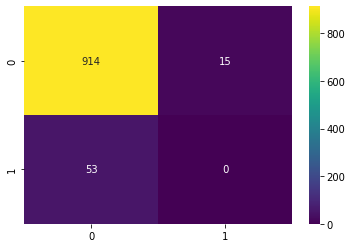


XGBoost (No SMOTE)
----------------------------------------
Prediction Accuracy: 0.9460285132382892
F1 Score           : 0.9722658294086866


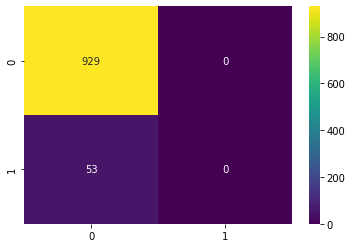


Random Forest (SMOTE)
----------------------------------------
Prediction Accuracy: 0.9409368635437881
F1 Score           : 0.9695697796432319


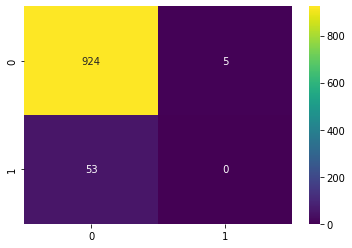


Random Forest (No SMOTE)
----------------------------------------
Prediction Accuracy: 0.9460285132382892
F1 Score           : 0.9722658294086866


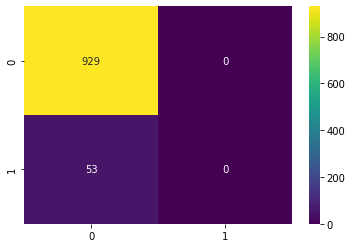


Logistic Regression (SMOTE)
----------------------------------------
Prediction Accuracy: 0.9307535641547862
F1 Score           : 0.9639065817409767


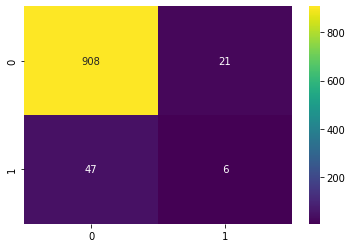


Logistic Regression (No SMOTE)
----------------------------------------
Prediction Accuracy: 0.9460285132382892
F1 Score           : 0.9722658294086866


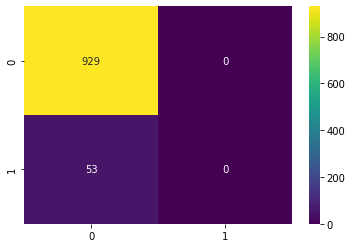


Best Model: Artificial Neural Network (No SMOTE)
Best F1   : 0.9722658294086866


In [ ]:
models = [('Artificial Neural Network (SMOTE)', ann_smote), 
          ('Artificial Neural Network (No SMOTE)', ann_no_smote), 
          ('XGBoost (SMOTE)', xgb_smote),
          ('XGBoost (No SMOTE)', xgb_no_smote),  
          ('Random Forest (SMOTE)', rf_smote),
          ('Random Forest (No SMOTE)', rf_no_smote),
          ('Logistic Regression (SMOTE)', lm_smote),
          ('Logistic Regression (No SMOTE)', lm_no_smote)]

scores = {}
best_model = ''
best_score = 0
for model in models:
    scores[model[0]] = []
    
    preds = model[1].predict(X_test).round()
    scores[model[0]].append(pred_acc(y_test, preds))
    scores[model[0]].append(f1_score(y_test, preds))

    if scores[model[0]][1] > best_score:
        best_score = scores[model[0]][1]
        best_model = model[0]

    print(model[0])
    print('-'*40)
    print('Prediction Accuracy:', scores[model[0]][0])
    print('F1 Score           :', scores[model[0]][1])
    plot_confusion_matrix(y_test, preds)
    print()

print('Best Model:', best_model)
print('Best F1   :', best_score)

In [ ]:
def catplot_with_percentage(factors, cats, title, *args):
    df_catplot = {'Factor': factors}

    offset = min(list(map(lambda x:min(x), args))) * 0.9
    for i in range(len(cats)):
        for j in range(len(factors)):
            args[i][j] -= offset
        df_catplot[cats[i]] = args[i]

    df_catplot = pd.DataFrame(df_catplot)

    fig = plt.figure(figsize=(len(factors)*2,9))
    catplot_smoke = df_catplot.melt(id_vars='Factor').rename(columns=str.title)
    sb.barplot(x='Factor', y='Value', hue='Variable', data=catplot_smoke, bottom=offset).set_title(title)
    plt.show()

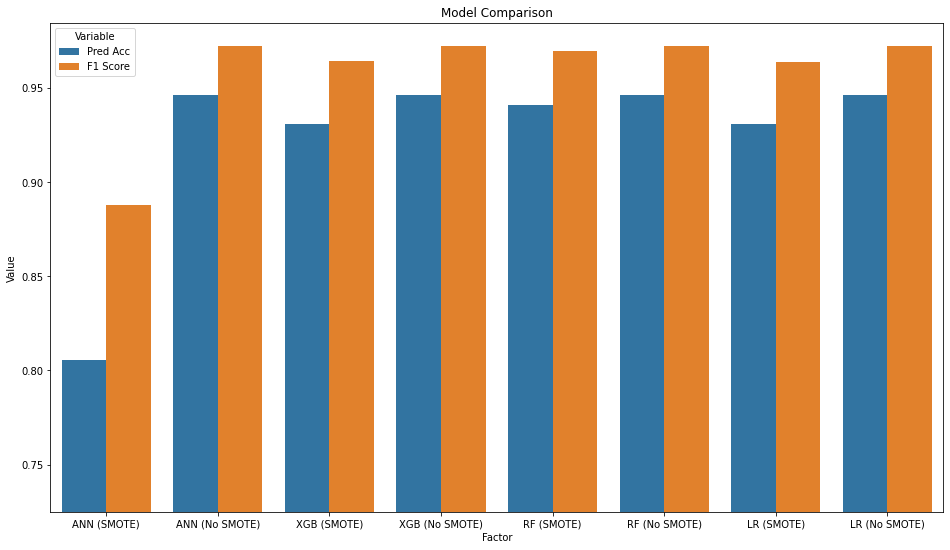

In [ ]:
catplot_with_percentage(['ANN (SMOTE)', 'ANN (No SMOTE)', 'XGB (SMOTE)', 'XGB (No SMOTE)', 'RF (SMOTE)', 'RF (No SMOTE)', 'LR (SMOTE)', 'LR (No SMOTE)'], 
                        ['Pred Acc', 'F1 Score'],
                        'Model Comparison',
                        [scores['Artificial Neural Network (SMOTE)'][0],
                         scores['Artificial Neural Network (No SMOTE)'][0],
                         scores['XGBoost (SMOTE)'][0],
                         scores['XGBoost (No SMOTE)'][0],
                         scores['Random Forest (SMOTE)'][0],
                         scores['Random Forest (No SMOTE)'][0],
                         scores['Logistic Regression (SMOTE)'][0],
                         scores['Logistic Regression (No SMOTE)'][0]],
                        [scores['Artificial Neural Network (SMOTE)'][1],
                         scores['Artificial Neural Network (No SMOTE)'][1],
                         scores['XGBoost (SMOTE)'][1],
                         scores['XGBoost (No SMOTE)'][1],
                         scores['Random Forest (SMOTE)'][1],
                         scores['Random Forest (No SMOTE)'][1],
                         scores['Logistic Regression (SMOTE)'][1],
                         scores['Logistic Regression (No SMOTE)'][1]]
                        )

In [ ]:
print('+----------+---------------------+---------------+------+---------+')
print('|          | Logistic Regression | Random Forest | ANN  | XGBoost |')
print('+----------+---------------------+---------------+------+---------+')
print('| Accuracy | {:19.2f} | {:13.2f} | {:4.2f} | {:7.2f} |'.format(scores['Logistic Regression (SMOTE)'][0],
                                                                      scores['Random Forest (SMOTE)'][0],
                                                                      scores['Artificial Neural Network (SMOTE)'][0],
                                                                      scores['XGBoost (SMOTE)'][0]))
print('| F1 Score | {:19.2f} | {:13.2f} | {:4.2f} | {:7.2f} |'.format(scores['Logistic Regression (SMOTE)'][1],
                                                                      scores['Random Forest (SMOTE)'][1],
                                                                      scores['Artificial Neural Network (SMOTE)'][1],
                                                                      scores['XGBoost (SMOTE)'][1]))

print('+----------+---------------------+---------------+------+---------+')

+----------+---------------------+---------------+------+---------+
|          | Logistic Regression | Random Forest | ANN  | XGBoost |
+----------+---------------------+---------------+------+---------+
| Accuracy |                0.93 |          0.94 | 0.81 |    0.93 |
| F1 Score |                0.96 |          0.97 | 0.89 |    0.96 |
+----------+---------------------+---------------+------+---------+


**Analysis:**

Generally, models that train on "No SMOTE" (or original data), perform better than models that train on "SMOTE" data. This is probably because the dataset is highly unbalanced (~95% no stroke, ~5% stroke). Hence, the models that train on "No SMOTE" tend to predict 0 for all test data, achieving a high accuracy of ~0.95. This can be seen from the confusion matrix.


However, this also means that the models that train on "No SMOTE" have zero predictive ability and accuracy is not a good metric for us. Therefore, we employed SMOTE to overcome theimbalanced data, putting more weight to the smaller class (stroke) and making the model biased to 'stroke' class. Hence, even if models training on "SMOTE" has lower prediction accuracy, they are better models for prediction of actual stroke cases.


Overall, we found that the Random Forest model is the best model out of our 4 selected models with the highest prediction accuracy and F1 score:

1) Artificial Neural Network

2) XGBoost 

3) Random Forest (Pred acc: 0.9409, F1: 0.9695)

4) Logistic Regression